# Import Necessary libraries

In [1]:
import os
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import numpy as np
from rasterio.plot import show_hist
from rasterio.plot import show

# Open Downloaded Sentinel Bands using rasterio

In [2]:
Band2 = rasterio.open('data/B2.tif')
Band3 = rasterio.open('data/B3.tif')
Band4 = rasterio.open('data/B4.tif')
Band8 = rasterio.open('data/B8.tif')
Band11 = rasterio.open('data/B11.tif')
Band12 = rasterio.open('data/B12.tif')
raster= rasterio.open('data/SentinelTrueColor.tiff')
raster2= rasterio.open('data/SentinelFalseColor1.tiff')

# Check the Count,width and Height of one Band (Band 4:Red band)

In [3]:
#number of raster bands
print(Band4.count)
#number of raster columns
print(Band4.width)
#number of raster rows
print(Band4.height)

1
735
607


# Read Band 4 as an array and plot

In [4]:
#read as an array
array = Band4.read(1)
array.shape

(607, 735)

## Plot band 4

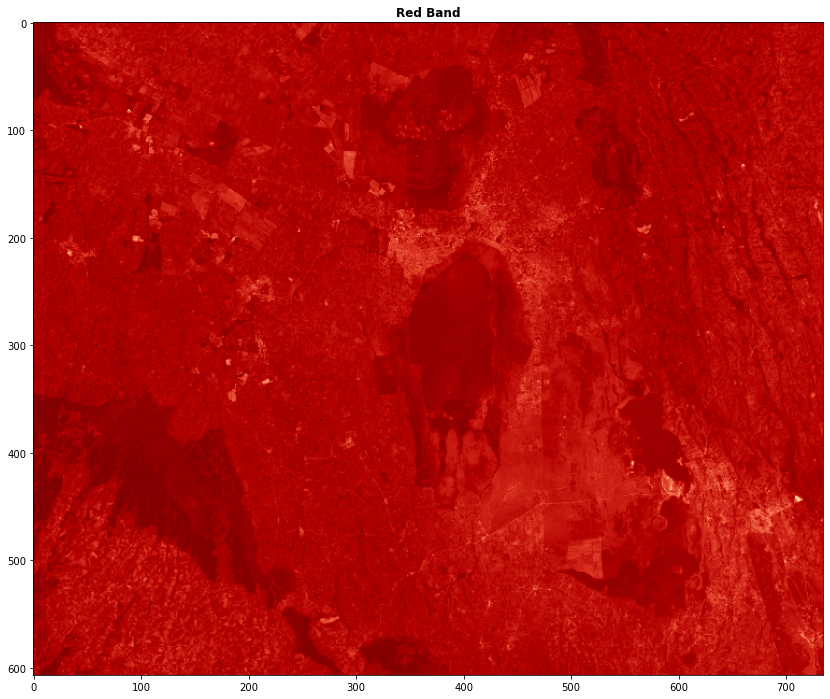

<AxesSubplot:title={'center':'Red Band'}>

In [5]:
fig = plt.figure(figsize=(18,12))
plot.show(array,cmap='OrRd_r',title="Red Band") 

## Check the data type, reference system and transformation parameters  of the band

In [6]:
#type of raster byte
Band4.dtypes[0]

'float32'

In [7]:
#raster sytem of reference
Band4.crs

CRS.from_epsg(4326)

In [8]:
#raster transform parameters
Band4.transform

Affine(0.0008084837557075694, 0.0, 35.77378922254853,
       0.0, -0.0008084837557075694, -0.12774043340179597)

# Plot the 3 bands together: Blue,Green and Red

From the above  we can see that the show function created a map showing the pixel values of each band for the 3 bands.

Let’s see how the different bands look like by placing them next to each other:

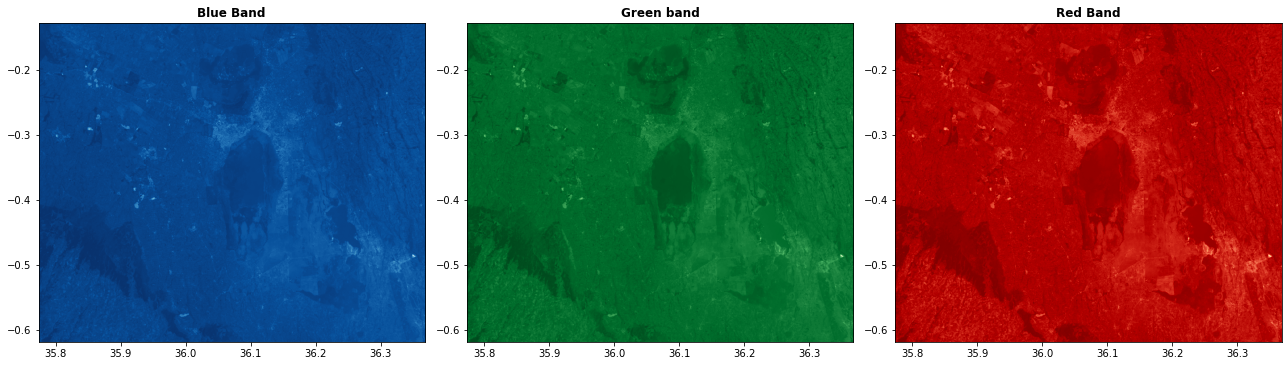

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 12))
plot.show(Band2, ax=ax1, cmap='Blues_r',title="Blue Band")
plot.show(Band3, ax=ax2, cmap='Greens_r',title="Green band")
plot.show(Band4, ax=ax3, cmap='OrRd_r',title="Red Band")
fig.tight_layout()

## RGB True Color

Next let’s see how to plot these channels as a normal RGB image.

First we need to read the bands into numpy arrays and normalize the cell values into scale ranging from 0.0 to 1.0:

In [10]:
# Read the grid values into numpy arrays
red = raster.read(3)
green = raster.read(2)
blue = raster.read(1)

# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

# Normalize the bands
redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)

print("Normalized bands")
print(redn.min(), '-', redn.max(), 'mean:', redn.mean())
print(greenn.min(), '-', greenn.max(), 'mean:', greenn.mean())
print(bluen.min(), '-', bluen.max(), 'mean:', bluen.mean())

Normalized bands
0.0 - 1.0 mean: 0.09471149
0.0 - 1.0 mean: 0.12541652
0.0 - 1.0 mean: 0.122716695


As the statistics show, now the arrays have been normalized into scale from 0 to 1.

Next we need to stack the values from different values together to produce the RGB true color composite. For this we can use Numpy’s dstack() -function:

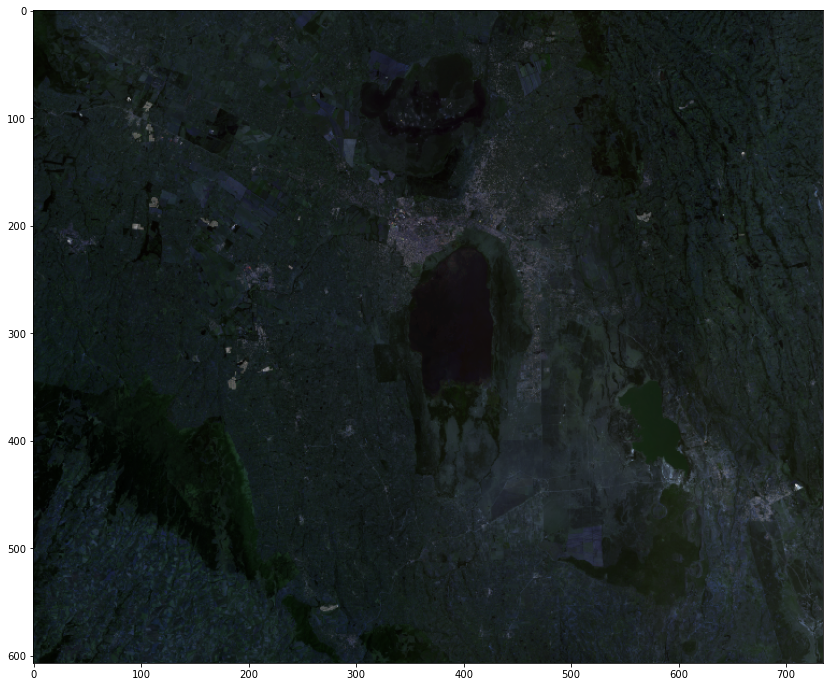

In [11]:
# Create RGB natural color composite
rgb = np.dstack((redn, greenn, bluen))

# Let's see how our color composite looks like
fig, ax = plt.subplots(1, figsize=(18, 12))
plt.imshow(rgb)

Here we go, now we have a typical RGB natural color composite image that looks like a photograph taken with the satellite.

## False color composite

Following the above example, it is easy to create false color composites with different band configurations.

One of the typical one, is to replace the blue band with near infra-red that can be used to detect vegetation easily where red color is emphasized. Let’s use the same raster file as input, and generate our first false color composite:

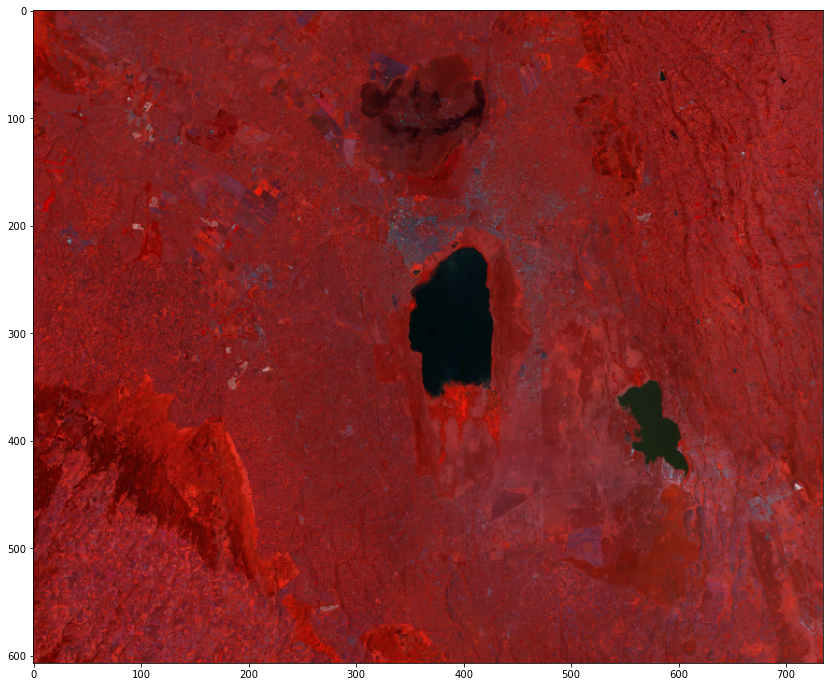

In [12]:
# Read the grid values into numpy arrays
nir = raster2.read(1)
red = raster2.read(3)
green = raster2.read(2)

# Normalize the values using the function that we defined earlier
nirn = normalize(nir)
redn = normalize(red)
greenn = normalize(green)

# Create the composite by stacking
nrg = np.dstack((nirn, redn, greenn))

# Let's see how our color composite looks like
fig, ax = plt.subplots(1, figsize=(18, 12))
plt.imshow(nrg)

As we can see, now the vegetation can be seen more easily from the image (red color).

# Raster map algebra

Conducting calculations between bands or raster is another common GIS task. Here, we will be calculating NDVI (Normalized difference vegetation index) based on the Sentinel dataset that we have downloaded from Google Earth Engine. Conducting calculations with rasterio is fairly straightforward if the extent etc. matches because the values of the rasters are stored as numpy arrays (similar to the columns stored in Geo/Pandas, i.e. Series).

### Calculating NDVI

In this tutorial, we will see how to calculate the NDVI (Normalized difference vegetation index) based on two bands: band-3 which is the Red channel and band-1 which is the Near Infrared (NIR) for our data source.

Let’s read the red and NIR bands from our raster source 

0.08246125
0.2494206
<class 'numpy.ndarray'>


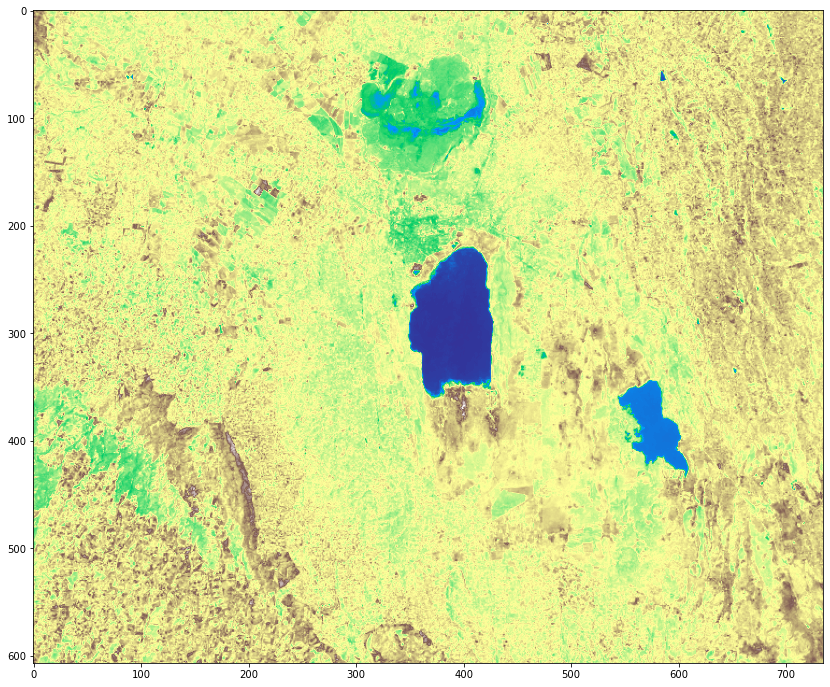

<AxesSubplot:>

In [13]:
# Read red channel (channel number 3)
red = raster2.read(3)
# Read NIR channel (channel number 1)
nir = raster2.read(1)

# Calculate some stats to check the data
print(red.mean())
print(nir.mean())
print(type(nir))

# Visualize
fig, ax = plt.subplots(1, figsize=(18, 12))
show(nir, cmap='terrain')

Let’s change the data type from uint8 to float so that we can have floating point numbers stored in our arrays:

In [14]:
# Convert to floats
red = red.astype('f4')
nir = nir.astype('f4')
nir

array([[0.3177 , 0.2944 , 0.30775, ..., 0.256  , 0.2788 , 0.2837 ],
       [0.32345, 0.3197 , 0.30255, ..., 0.2563 , 0.2748 , 0.2774 ],
       [0.35195, 0.3384 , 0.30825, ..., 0.2591 , 0.2736 , 0.2654 ],
       ...,
       [0.3622 , 0.3638 , 0.3535 , ..., 0.288  , 0.2876 , 0.2812 ],
       [0.32415, 0.32605, 0.29705, ..., 0.284  , 0.2826 , 0.2809 ],
       [0.2991 , 0.3473 , 0.3196 , ..., 0.2868 , 0.2836 , 0.2856 ]],
      dtype=float32)

Now we can see that the numbers changed to decimal numbers (there is a dot after the zero).

Next we need to tweak the behaviour of numpy a little bit. By default numpy will complain about dividing with zero values. We need to change that behaviour because we have a lot of 0 values in our data.

In [15]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

Now we are ready to calculate the NDVI. This can be done easily with simple map algebra and using the NDVI formula and passing our numpy arrays into it:

In [16]:
# Calculate NDVI using numpy arrays
ndvi = (nir - red) / (nir + red)

Let’s plot the results so we can see how the index worked out:

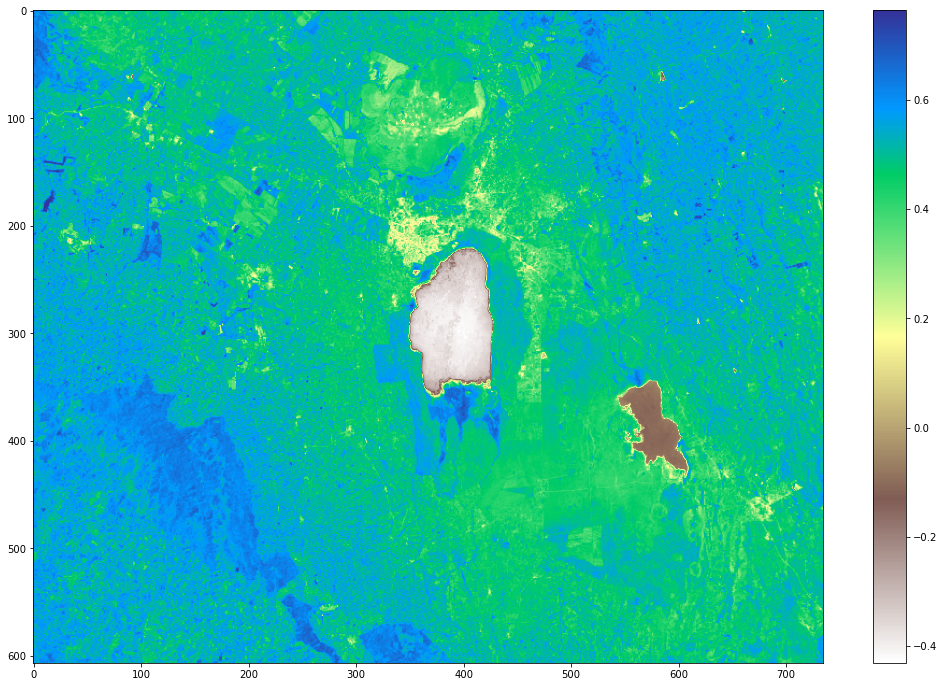

In [17]:
# Plot the NDVI
fig, ax = plt.subplots(1, figsize=(18, 12))
plt.imshow(ndvi, cmap='terrain_r')
# Add colorbar to show the index
plt.colorbar()

As we can see from the map, now the really low NDVI indices are located in water and urban areas (middle of the map) whereas the areas colored with green have a lot of vegetation according our NDVI index.